# THEORETICAL COMPUTER SCIENCE PROJECT

## 4BIM - S1

In [1]:
%matplotlib inline

In [608]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import networkx as nx
import itertools
from networkx.drawing.nx_agraph import graphviz_layout
from __future__ import division 
import collections
from networkx.algorithms.richclub import rich_club_coefficient 
import seaborn as sns 
import random 
import math
from operator import itemgetter
from community import community_louvain
from networkx.algorithms import community
from itertools import count

In [2]:
def Betweenness_centrality (G, norm ,K, R ):

    if norm == False :
        BC1 = nx.betweenness_centrality(G, k=K, normalized=norm, endpoints=False)
        G_title = 'Non-normalized betweenness centrality distribution'
        
    else :
        BC1 = nx.betweenness_centrality(G, k=K, normalized=norm, endpoints=False)
        G_title = 'Normalized betweenness centrality distribution'
    BC0 = BC1.values()
    bc =[]
    for i in BC0 :
        if i > 0:
            bc.append(i)
    plt.figure()
    ax = plt.hist(bc, density=True,alpha=0.5,  color = 'red')
    
    plt.show()
        
    if R == True: # We compute betweenness centrality for random graph
        e1 = []
        e2 = []
        for e in G.edges():
            e1.append(e[0])
            e2.append(e[1])
        random.shuffle(e2) 
        random_graph= nx.Graph()
        random_graph.add_edges_from([(e1[i],e2[i]) for i in range(len(e1))])    
        random_BC  = nx.betweenness_centrality(random_graph, k=K, normalized=norm, endpoints=False)
        
        x = np.arange(len(BC1.values()))
        plt.figure()
        ax1 = sns.scatterplot( x,random_BC.values() , color='black')
        ax1 = sns.scatterplot(x,BC1.values(), color= 'red') 
        ax1.set_title(G_title)
        ax1.set_ylabel('Betweenness centrality')            
        ax1.set_xlabel('vertex')
        plt.show()
        return BC1, random_BC
   
    else :
        x = np.arange(len(BC1.values()))
        plt.figure()
        ax1 = sns.scatterplot(x,BC1.values(), color= 'red') 
        ax1.set_title(G_title)
        ax1.set_ylabel('Betweenness centrality')            
        ax1.set_xlabel('vertex')
        plt.show()
        return BC1
    # Distribution of betweenness centrality of the netkork G ommiting nodes with 0 betweenness centrality
  

In [3]:
def DFS_graph (G,n, lab):
    '''n is the departure node label (str)'''
    L = (list(nx.dfs_edges(G, source=n)))
    print(L)
    GDFS=nx.Graph()
    GDFS.add_edges_from(L)
    nx.draw_networkx(GDFS, with_labels=lab , node_size=100  )

    plt.axis('off')

In [4]:
def egocentric_graph(G,largest_hub_n):
    '''egocentric_graph draws the network between a central node and its neighbors. 
    The central node is defined by its rank in a decreasing list of the degree distribution.
    (eg. largest_hub_n=1, the central node is the one whith the highest degree. )'''
    
    node_and_degree = G.degree()
    (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-largest_hub_n]
    # Create ego graph of main hub
    hub_ego = nx.ego_graph(G, largest_hub)
    # Draw graph
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
    # Label the largest hub
    
    labels = {} 
    labels[largest_hub]=largest_hub

    #Now only add labels to the nodes you require (the hubs in my case)
    nx.draw_networkx_labels(DG3,pos,labels,font_size=16,font_color='cyan')

In [5]:
def graph_with_degree(G,n= 0):
    ''' graph_with_degree draws a network, where node color refers to their degree.
    n it's a optionnal argument that defines the number of nodes. '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    N= []
    nodes_color =[]
    for (node, val) in G.degree():
        N.append(node)
        nodes_color.append(val*4)
    if n!=0:       
        N = N[:n] 
        nodes_color = nodes_color[:n]

    DG = G.subgraph(N)  
    nx.spring_layout(DG, dim = 20)
   
    nx.draw_networkx(DG,node_color=nodes_color , with_labels=False ,  node_size=30,cmap = plt.get_cmap('jet'), alpha=0.3 ) 
    plt.axis('off')

In [6]:
def Hist_degree(G,prob, Type):

    random_graph= nx.erdos_renyi_graph(n= len(G), p= prob, directed = True) 
    if Type == 'out':
        out_list =[]
        out_list_r = []
        for elmt in G.out_degree:
            out_list.append(elmt[1])
          
        for relmt in random_graph.out_degree : 
            out_list_r.append(relmt[1])
        x1 = pd.Series(out_list_r)   
        x2 = pd.Series(out_list)
        
        newbins = np.arange(min(x2), max(x2), 1)
        plt.hist(x1, density=True, bins = newbins,alpha=0.5, color = 'grey')
        plt.hist(x2, density=True, bins = newbins, alpha=0.3, color='red')
        plt.title('Out degree distribution')
        plt.xlabel('out degree')
        plt.ylabel('density')
        
    if Type == 'in':
        in_list =[]
        in_list_r = []
        for elmt in G.in_degree:
            in_list.append(elmt[1])
        for relmt in random_graph.in_degree : 
            in_list_r.append(relmt[1])
        x1 = pd.Series(in_list_r)
        x2 = pd.Series(in_list)
        
        newbins = np.arange(min(x2), max(x2), 1)
        plt.hist(x1, density=True, bins = newbins,alpha=0.5, color = 'grey')
        plt.hist(x2, density=True, bins = newbins,alpha=0.3, color='red')
        plt.title('In degree distribution')
        plt.xlabel('In degree')
        plt.ylabel('density')
       
        
    if Type == 'both':
        random_graph.to_undirected()
        both_list =[]
        both_list_r =[]
        for elmt in nx.degree(G):
            both_list.append(elmt[1])
        for relmt in random_graph.degree : 
            both_list_r.append(relmt[1])
        
        x1 = pd.Series(both_list_r)
        x2 = pd.Series(both_list)
        newbins = np.arange(min(x2), max(x2), 1)
        plt.hist(x1, density=True,bins = newbins, alpha=0.5, color = 'grey')
        plt.hist(x2, density=True, bins = newbins,alpha=0.3, color='red')
        plt.title('Degree distribution')
        plt.xlabel('degree')
        plt.ylabel('density')
     
    return x2 , x1

In [527]:
def kshell (G):
    '''kshell is functionn that calculates the k_shell cover number nodes contained in the graph G.
    kshell returns a data frame containing nodes, their degree and their k_shell cover number.
    We define the k_shell cover number as the step at which a nove is removed, eitheir because its degree
    is lower than the current degree (k), or because after the removing of nodes at the step k^th the 
    the node get a degree lower of equal to 1.'''
  
    G2 = G.copy() # Copy of the inital graph
    nodes_and_degrees = G2.degree() # List of nodes and their degree
    k_shell = [] # List containing the final result
    c_k_shell=[] # List of nodes removes at the step k, current_k_shell 
    k=1 # initialization
    
    while len(nodes_and_degrees) >0: 
        for elmt in nodes_and_degrees :
            if elmt[1] <= k: # if the degree of the current node is lower than k,
                c_k_shell.append((elmt[0],k)) # we add this node and its k_shell cover number to the list c_k_shell.
        if len(c_k_shell)>1:  
            for n in c_k_shell: 
                G2.remove_node(n[0]) # we delete all nodes contain in the list c_k_shell from the graph G2.
                    
            # After the removing of nodes with a degree lower than k, we remove the remaining nodes, with a degree 
            # lower or equal to 1
            
            nodes_and_degrees1 = G2.degree() #List of nodes and their respective degree after the removing.
            nodes_deg_1 = [] # List of nodes with a degree lower or equal to 1.
            for elmt in nodes_and_degrees1 : # For each element in the list nodes_and_degrees1, 
                if elmt[1] <= 1: # if a node has a degree lower or equal to 1,
                        nodes_deg_1.append((elmt[0],k)) # we add this node in nodes_deg_1, and 
                        c_k_shell.append((elmt[0],k)) #  c_k_shell.
              
        if len(nodes_deg_1)>1: 
            for n1 in nodes_deg_1:   
                G2.remove_node(n1[0])  # we delete all nodes contain in the list nodes_deg_1 from the graph G2.
        nodes_and_degrees = G2.degree() # We update the list of nodes_and_degrees.
        k_shell.append(c_k_shell) # We add the removed element and their k_shell cover number to the list k_shell.
        c_k_shell = [] # we empty the current k_shell list
        k+=1 # We increment k of 1.
    return k_shell
    

In [449]:
def louvain_community_graph(G,partition_n):
    partition = community_louvain.best_partition(G.to_undirected())
    N =[]
    for key, value in partition.iteritems():
        if value==partition_n :
            N.append(key)

    DG = G.subgraph(N)
    nx.draw_spring(DG, cmap = plt.get_cmap('jet'), node_color = 'blue' ,node_size=30, with_labels=False)
    node_and_degree = DG.degree()
    

In [9]:
def rich_club(G, normalized, N):
    '''rich_club compute the non-normalized rich-club coefficient, if normalized == False,
     or the normalized one in the opposite case.
     rich_club returns a graph with the rich_club coefficients infer from data (red points), and
     rich_club coefficients infer from  random data (black points); the number of random dataset is definined by N'''
    G.remove_edges_from(G.selfloop_edges())
    
    if normalized == False :
        RC1 = rich_club_coefficient(G.to_undirected(), normalized=False)
        G_title = 'Non-normalized rich cub coefficient'
        norm = False
    else :
        
        RC1 = rich_club_coefficient(G.to_undirected(), normalized=True)
        G_title = 'Normalized rich cub coefficient'
        norm = True
        
    for i in range(N):
        e1 = []
        e2 = []
        for e in G.edges():
            e1.append(e[0])
            e2.append(e[1])
        random.shuffle(e2) 
        random_graph= nx.Graph()
        random_graph.add_edges_from([(e1[i],e2[i]) for i in range(len(e1))])
        random_graph.remove_edges_from(random_graph.selfloop_edges())
        
        random_RC  = rich_club_coefficient(random_graph.to_undirected(), normalized=norm)
            
        ax1 = sns.scatterplot(random_RC.keys(), random_RC.values(), color='black')
    ax1 = sns.scatterplot(RC1.keys(), RC1.values(), color= 'red')    
    ax1.set_title(G_title)
    ax1.set_ylabel('rich club coeff. r(k)')            
    ax1.set_xlabel('k')
                
  #  return RC1

## Exercice 1

### Load dataset

In [29]:
edges = pd.read_csv('GRN_edges_S_cerevisiae.txt')# load the nodes labels from GRN_edges_S_cerevisiae.txt
edges = edges.set_index('Unnamed: 0') # set index with first column

In [11]:
#edges

In [12]:
transcription_factors_id = pd.read_csv('net4_transcription_factors.tsv')

In [13]:
transcription_factors_id[1:10]

transcription_factor
1                   G2
2                   G3
3                   G4
4                   G5
5                   G6
6                   G7
7                   G8
8                   G9
9                  G10

In [14]:
genes_id = pd.read_csv('net4_gene_ids.tsv', sep ='\t')

In [15]:
genes_id[1:10]
genes_id.loc[genes_id['ID'] == 'G5798']

ID     Name
5797  G5798  YDR527W

In [16]:
gene_go_mapping = pd.read_csv('go_slim_mapping.tab.txt', sep='\t', header=None)

In [17]:
gene_go_mapping


0         1           2  3  \
0           HRA1      HRA1  S000119380  C   
1           HRA1      HRA1  S000119380  F   
2           HRA1      HRA1  S000119380  P   
3           HRA1      HRA1  S000119380  P   
4           ICR1      ICR1  S000132612  C   
5           ICR1      ICR1  S000132612  F   
6           ICR1      ICR1  S000132612  P   
7           LSR1      LSR1  S000006478  C   
8           LSR1      LSR1  S000006478  F   
9           LSR1      LSR1  S000006478  P   
10          LSR1      LSR1  S000006478  P   
11          NME1      NME1  S000007436  C   
12          NME1      NME1  S000007436  F   
13          NME1      NME1  S000007436  F   
14          NME1      NME1  S000007436  P   
15          NME1      NME1  S000007436  P   
16          NME1      NME1  S000007436  P   
17          PWR1      PWR1  S000132614  C   
18          PWR1      PWR1  S000132614  F   
19          PWR1      PWR1  S000132614  P   
20         Q0010       NaN  S000007257  C   
21         Q0010       NaN  S000007257  F   
22         Q0010       NaN  S000007257  P   
23         Q0017       NaN  S000007258  C   
24         Q0017       NaN  S000007258  F   
25         Q0017       NaN  S000007258  P   
26         Q0020  15S_RRNA  S000007287  C   
27         Q0020  15S_RRNA  S000007287  C   
28         Q0020  15S_RRNA  S000007287  C   
29         Q0020  15S_RRNA  S000007287  F   
...          ...       ...         ... ..   
42855  tY(GUA)F2      SUP6  S000006780  F   
42856  tY(GUA)F2      SUP6  S000006780  F   
42857  tY(GUA)F2      SUP6  S000006780  P   
42858  tY(GUA)J1      SUP7  S000006781  C   
42859  tY(GUA)J1      SUP7  S000006781  F   
42860  tY(GUA)J1      SUP7  S000006781  F   
42861  tY(GUA)J1      SUP7  S000006781  P   
42862  tY(GUA)J2      SUP4  S000006782  C   
42863  tY(GUA)J2      SUP4  S000006782  F   
42864  tY(GUA)J2      SUP4  S000006782  F   
42865  tY(GUA)J2      SUP4  S000006782  P   
42866  tY(GUA)M1      SUP5  S000006783  C   
42867  tY(GUA)M1      SUP5  S000006783  F   
42868  tY(GUA)M1      SUP5  S000006783  F   
42869  tY(GUA)M1      SUP5  S000006783  P   
42870  tY(GUA)M2      SUP8  S000006784  C   
42871  tY(GUA)M2      SUP8  S000006784  F   
42872  tY(GUA)M2      SUP8  S000006784  F   
42873  tY(GUA)M2      SUP8  S000006784  P   
42874   tY(GUA)O      SUP3  S000006785  C   
42875   tY(GUA)O      SUP3  S000006785  F   
42876   tY(GUA)O      SUP3  S000006785  F   
42877   tY(GUA)O      SUP3  S000006785  P   
42878   tY(GUA)Q       NaN  S000007338  C   
42879   tY(GUA)Q       NaN  S000007338  C   
42880   tY(GUA)Q       NaN  S000007338  F   
42881   tY(GUA)Q       NaN  S000007338  F   
42882   tY(GUA)Q       NaN  S000007338  P   
42883   tY(GUA)Q       NaN  S000007338  P   
42884   tY(GUA)Q       NaN  S000007338  P   

                                                   4           5            6  
0                                 cellular_component  GO:0005575   ncRNA_gene  
1                                 molecular_function  GO:0003674   ncRNA_gene  
2                                    rRNA processing  GO:0006364   ncRNA_gene  
3                 ribosomal small subunit biogenesis  GO:0042274   ncRNA_gene  
4                                            nucleus  GO:0005634   ncRNA_gene  
5                                 molecular_function  GO:0003674   ncRNA_gene  
6      transcription from RNA polymerase II promoter  GO:0006366   ncRNA_gene  
7                                            nucleus  GO:0005634   snRNA_gene  
8                                        RNA binding  GO:0003723   snRNA_gene  
9                                       RNA splicing  GO:0008380   snRNA_gene  
10                                   mRNA processing  GO:0006397   snRNA_gene  
11                                             other         NaN  snoRNA_gene  
12                                hydrolase activity  GO:0016787  snoRNA_gene  
13                                 nuclease activity  GO:0004518  snoRNA_gene  
14                      

In [18]:
gene_go_mapping = gene_go_mapping.drop(gene_go_mapping.columns[[1, 2, 3, 4,6]], axis=1) # keeping columns 0 and 5 only

In [19]:
gene_go_mapping[1:10]

0           5
1  HRA1  GO:0003674
2  HRA1  GO:0006364
3  HRA1  GO:0042274
4  ICR1  GO:0005634
5  ICR1  GO:0003674
6  ICR1  GO:0006366
7  LSR1  GO:0005634
8  LSR1  GO:0003723
9  LSR1  GO:0008380

### NetworkX graph instance

In [20]:
#G=nx.from_pandas_dataframe(df, 'input', 'output', 'weight') # an undirected graph in python 2.7
# creating a directed graph (raccourci)
DG=nx.from_pandas_edgelist(edges.iloc[0:40,:], 'transcription_factor', 'target_gene', create_using= nx.DiGraph() ) #python3

In [21]:
DG.nodes

NodeView(('G27', 'G25', 'G22', 'G23', 'G20', 'G21', 'G29', 'G41', 'G68', 'G45', 'G61', 'G101', 'G1', 'G109', 'G95', 'G9', 'G121', 'G254', 'G273', 'G168', 'G319', 'G211', 'G212', 'G98', 'G30', 'G138', 'G76', 'G19', 'G15', 'G14', 'G13', 'G12', 'G11', 'G139', 'G112', 'G111', 'G224', 'G87'))

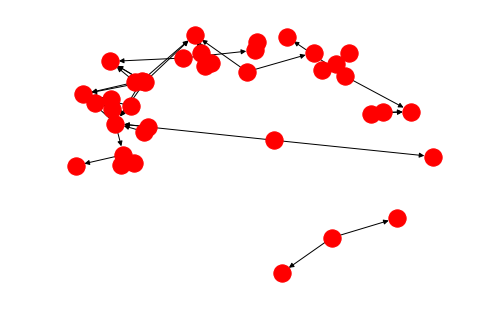

In [22]:
nx.draw(DG)

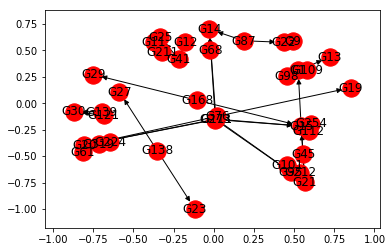

In [20]:
nx.draw_networkx(DG, with_labels=True) # pour faire des graphes plus jolis (à explorer)

### Graph of the transcription factors ids and gene ids

In [21]:
edges[1:10]

transcription_factor target_gene
Unnamed: 0                                 
1                           G98          G1
2                          G109          G1
3                           G22          G9
4                          G211         G11
5                           G41         G12
6                            G1         G13
7                           G68         G14
8                           G87         G14
9                          G111         G14

In [382]:
len(set(edges['transcription_factor']))

114

In [384]:
len(set(edges['target_gene']))

1934

In [385]:
1934+114

2048

In [22]:
edges['target_gene'][0] == genes_id['ID'][0]

True

In [23]:
################# ESSAI qui NE MARCHE PAS ##########################
'''
genes_name_edges = []
for x in edges['target_gene'] :
    i=0
    print('x=', x)
    y = genes_id['ID'][i] # first gene ID in genes_id
    while y != x:
        i+=1
        y=genes_id['ID'][i]
        print('y=', y)
    if i==0:
        genes_name_edges.append(genes_id['Name'][0])
    else :
        genes_name_edges.append(genes_id['Name'][i-1])
    '''

"\ngenes_name_edges = []\nfor x in edges['target_gene'] :\n    i=0\n    print('x=', x)\n    y = genes_id['ID'][i] # first gene ID in genes_id\n    while y != x:\n        i+=1\n        y=genes_id['ID'][i]\n        print('y=', y)\n    if i==0:\n        genes_name_edges.append(genes_id['Name'][0])\n    else :\n        genes_name_edges.append(genes_id['Name'][i-1])\n    "

In [23]:
genes_name_edges = []
y = genes_id['ID'] # list of genes ID
for x in edges['target_gene'] :
    i = list(y[y==x].index)[0] # index of the gene 'x' in the list of gene IDs
    genes_name_edges.append(genes_id['Name'][i])
    

In [24]:
named_edges = edges.copy()
named_edges = named_edges.assign(target_name = genes_name_edges)
named_edges = named_edges.drop(named_edges.columns[[1]], axis=1)

In [25]:
named_edges[1:10]

transcription_factor target_name
Unnamed: 0                                 
1                           G98     YHR084W
2                          G109     YHR084W
3                           G22     YBR150C
4                          G211     YGL071W
5                           G41     YLR223C
6                            G1     YPL048W
7                           G68     YPR065W
8                           G87     YPR065W
9                          G111     YPR065W

In [27]:
# Directed graph
DG2=nx.from_pandas_edgelist(named_edges.iloc[0:40,:], 'transcription_factor', 'target_name', create_using= nx.DiGraph() ) #python3

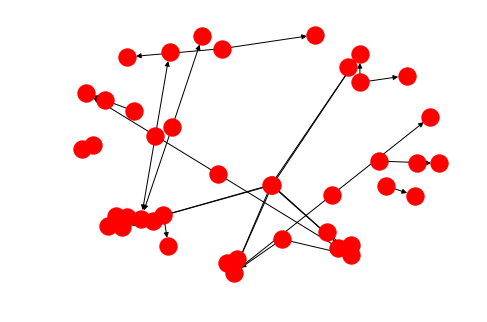

In [28]:
nx.draw(DG2)

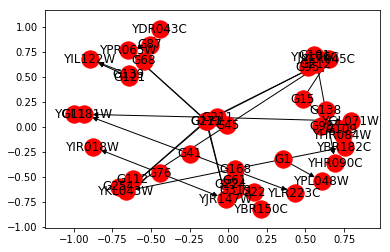

In [29]:
nx.draw_networkx(DG2, with_labels=True)

Remarque : Si les "transcription factors" sont les même gènes que les "target_genes" alors il faudra refaire ce processus sur les "transcription factors" ( pour avoir leur nom à eux aussi). En outre, il faudra refaire un graphe (puisque dans ce cas certains noeuds pourront à la fois avoir des flèches en "entrée" et en "sortie").( Ou alors on pourra tout simplement garder le premier graphe qui contient les ID au lieu des noms).

Dans le cas contraire, je pense qu'il faudra alors laisser comme ça pour distinguer les "transcription factors" des "target genes".  

## Metrics 

In [317]:
DG3=nx.from_pandas_edgelist(edges, 'transcription_factor', 'target_gene', create_using= nx.DiGraph() ) #python3
len(DG3.edges())
nx.info(DG3)
Deg = DG3.degree()
degg =[]
for i in Deg :
    degg.append(i[1])
max(degg)        

219

### Degree distribution

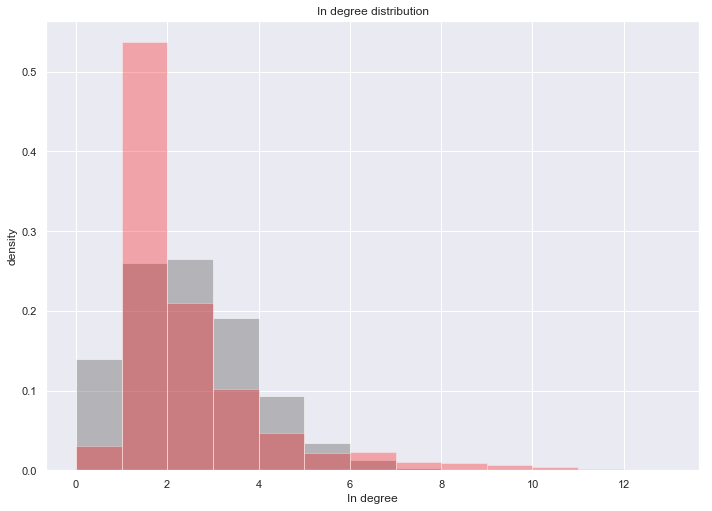

In [309]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
H = Hist_degree(DG3, 9.9*10**(-4) ,'in')

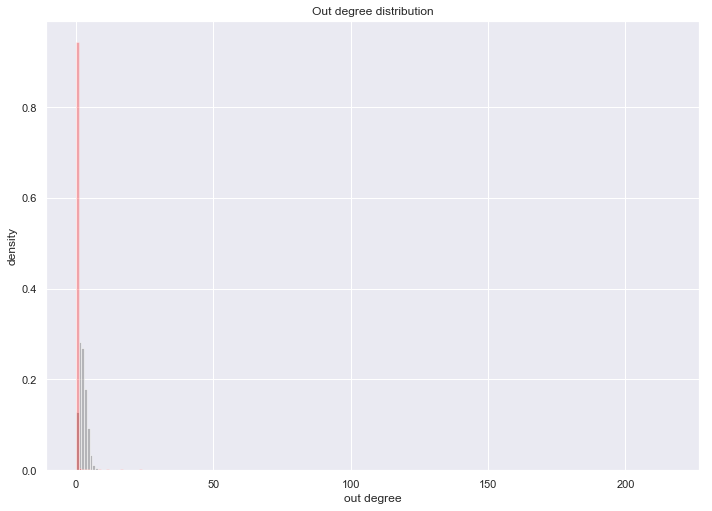

In [317]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
H = Hist_degree(DG3,  9.9*10**(-4),'out')


In [337]:
H0 = H[0]
H1 = H[1]
H0 = H0[H0!=0]
H1 = H1[H1!=0]
newbins = np.arange(min(H0), max(H0), 0.5)
max(H0)
max(H1)

11

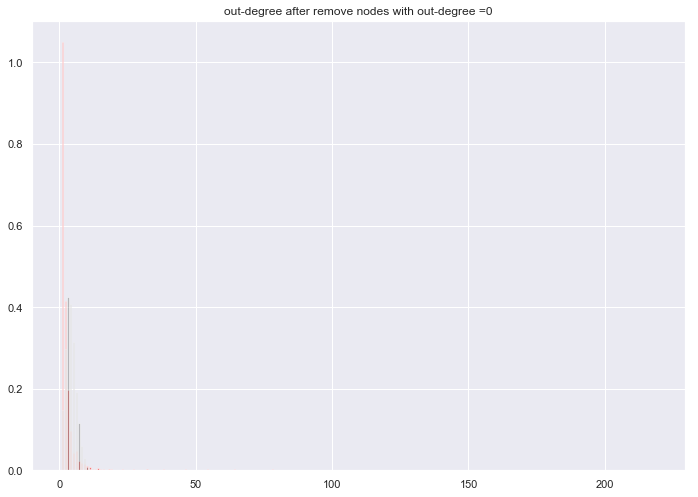

In [338]:
P =plt.hist(H0, density=True, bins = newbins,alpha=0.5, color = 'red')
P = plt.hist(H1, density=True, bins = newbins,alpha=0.5, color='grey')
P = plt.title('out-degree after remove nodes with out-degree =0')

In [35]:
# A recentrer

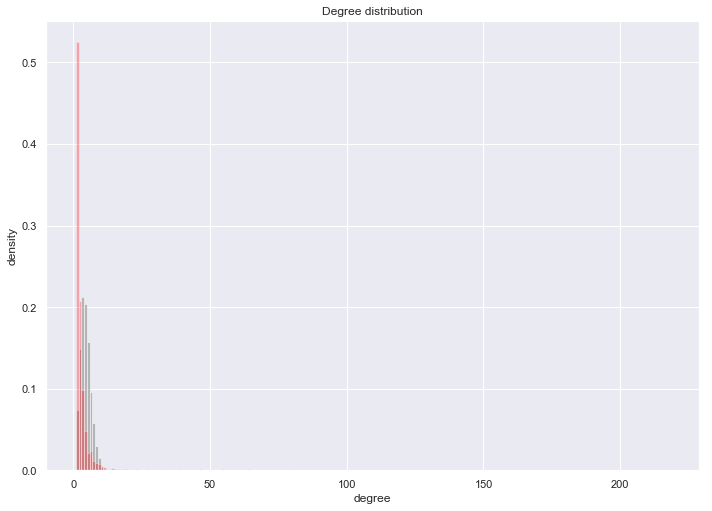

In [329]:
H= Hist_degree(DG3,  9.9*10**(-4),'both')

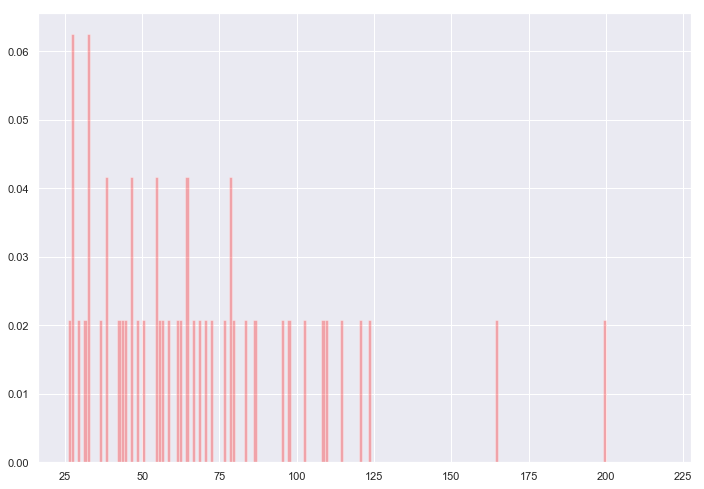

In [340]:
H0 = H[0]
H1 = H[1]
H0 = H0[(25 <= H0)]
H1 = H1[(25 <= H1)]

newbins = np.arange(min(H0), max(H0), 1)
P =plt.hist(H0, density=True, bins = newbins,alpha=0.3, color = 'red')
P = plt.hist(H1, density=True, bins = newbins,alpha=0.3, color='grey')

In [260]:
 nx.erdos_renyi_graph(n= len(DG3), p= 9.9*10**(-4), directed = True)

In [259]:
prob= 9.9*10**(-4)
prob


0.00099

In [38]:
# A recentrer

### Rich-club coefficient

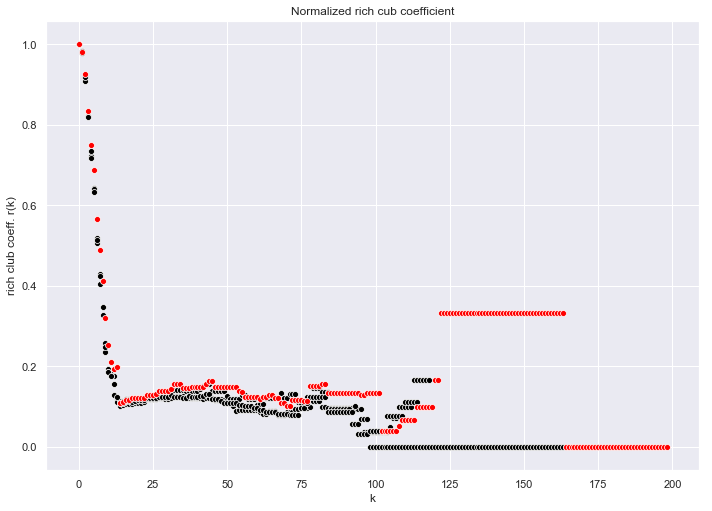

In [358]:
rich_club(DG3, True , 3)

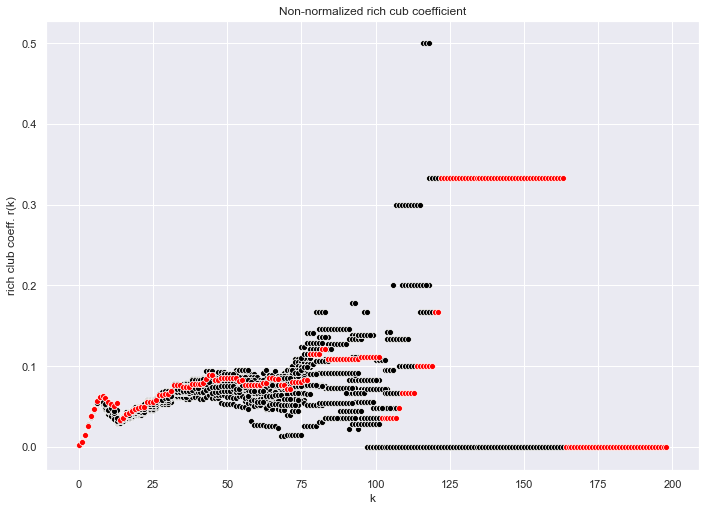

In [355]:
rich_club(DG3, False , 25 )

### Betweenness centrality

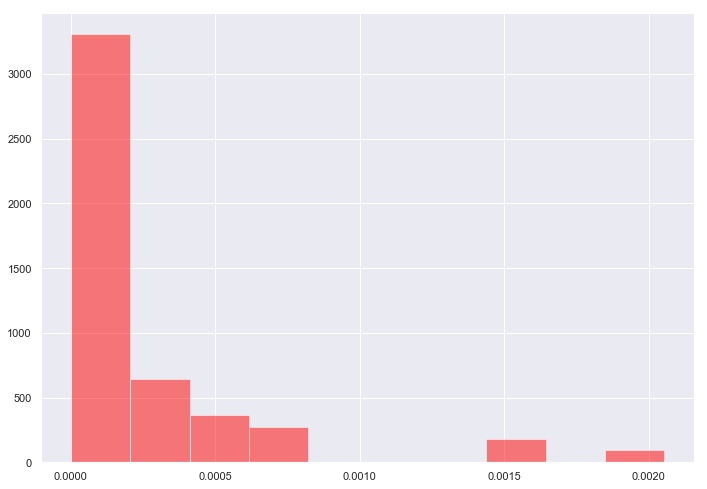

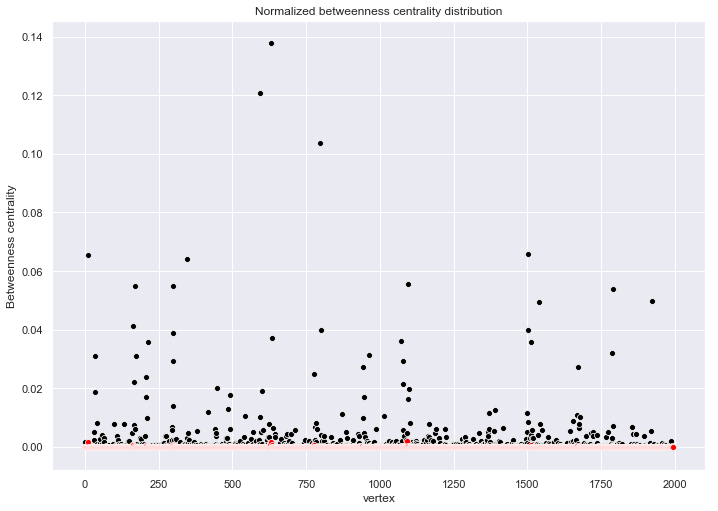

In [391]:
BC = Betweenness_centrality (DG3, True , None ,1 )

Text(0.5,0,'vertex')

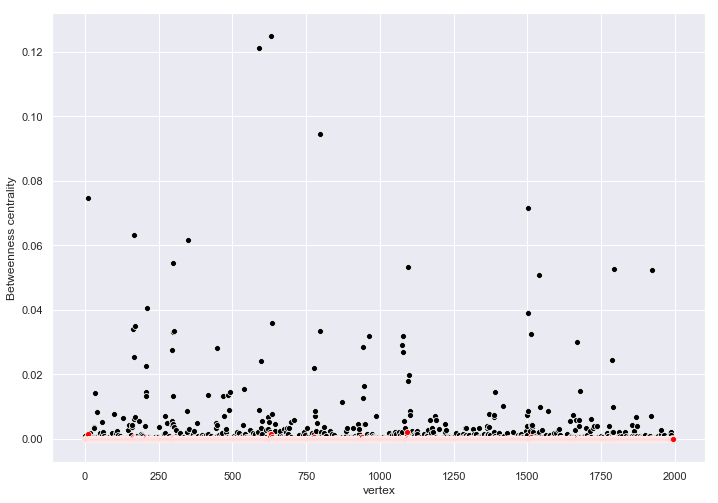

In [42]:
BC[0]
BC[0].values()
x = np.arange(len(BC[0].values()))
ax1 = sns.scatterplot( x,BC[1].values() , color='black')
ax1 = sns.scatterplot(x,BC[0].values(), color= 'red')    

ax1.set_ylabel('Betweenness centrality')            
ax1.set_xlabel('vertex')



In [393]:
len(BC[0])

1994

<type 'list'>


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

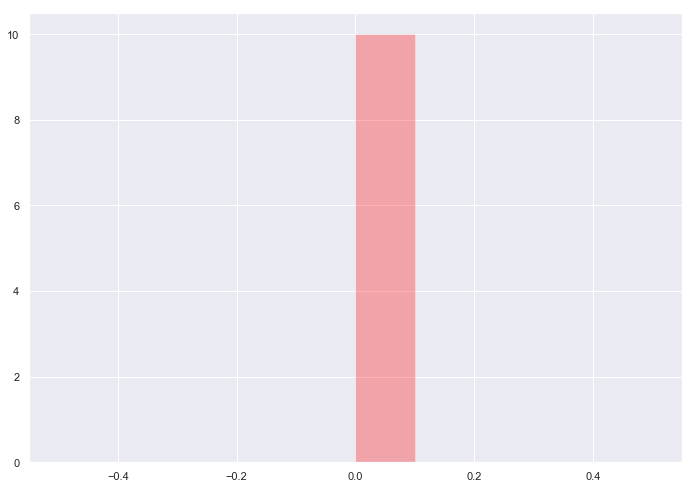

In [43]:
#BC0 = BC[0].values()
#print(type(BC0))
#BC0 = BC0[BC0!=0]
#plt.hist(BC0, density=True,  alpha=0.3, color='red')

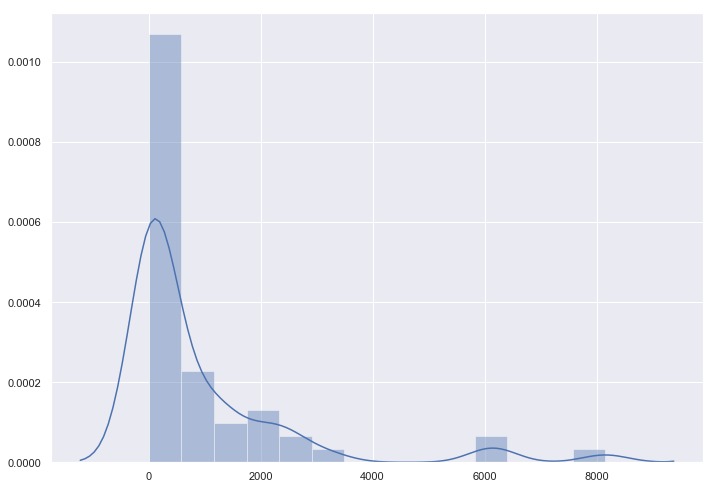

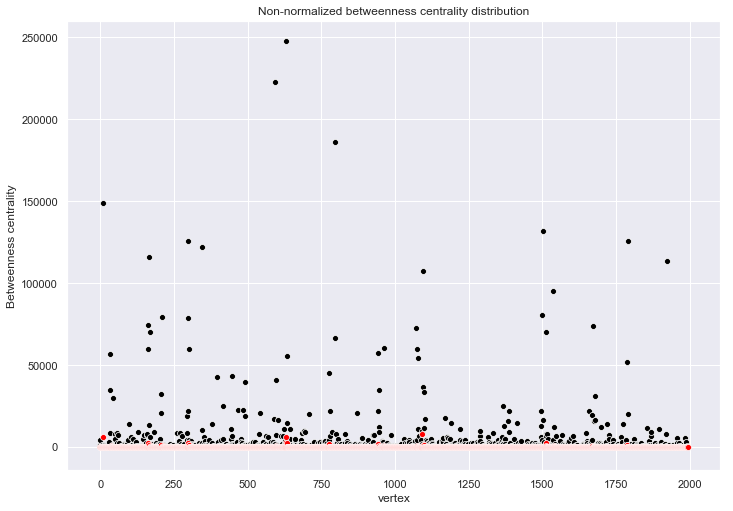

In [44]:
BC = Betweenness_centrality (DG3, False , None ,1 )

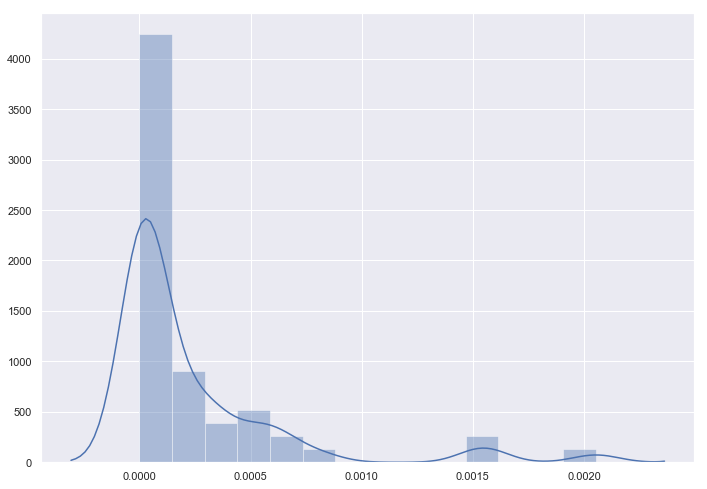

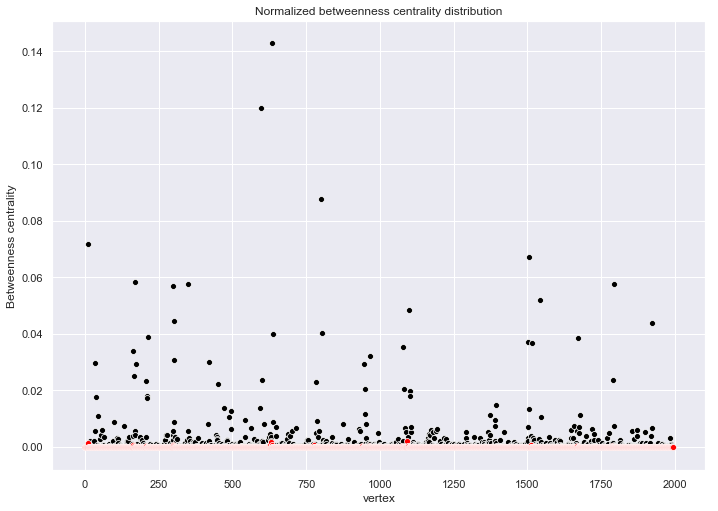

In [47]:
B = Betweenness_centrality (DG3, True, None, True )

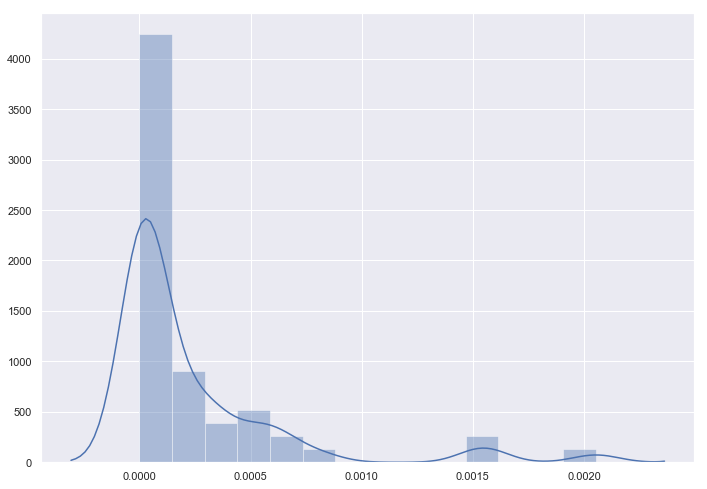

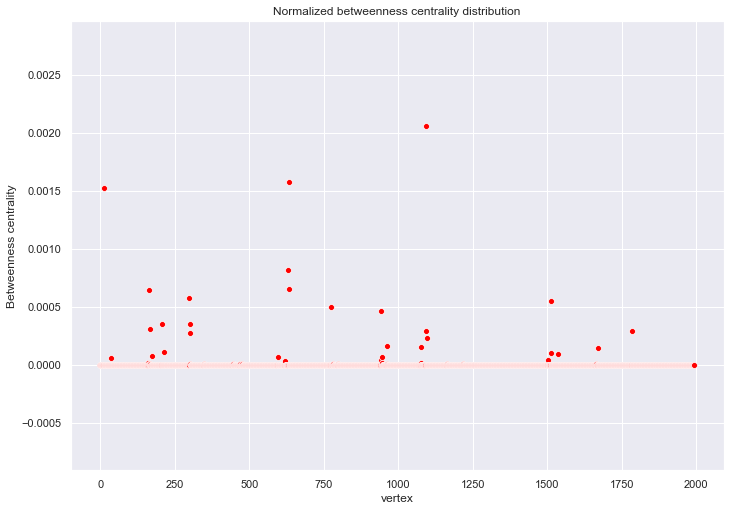

In [380]:
B = Betweenness_centrality (DG3,True , None, False )

In [421]:
Deg_v = []
Deg= list(Deg)
for n, v in Deg:
    Deg_v.append(v)


In [422]:
B_v =[]

for n,bc in B.iteritems():
    B_v.append(bc)
    
#print(B_v)    

In [441]:
sorted_B = sorted(B, key=itemgetter(1))
LB = []
for key, value in B.iteritems():
    l = (key, value)
    LB.append(l)
#print(LB)    
print(sorted(LB, key=lambda tup: tup[1], reverse=True))[1:20]
print(sorted(Deg, key=lambda tup: tup[1], reverse=True))[1:20]
#print(LB[1:15])
#print(Deg[1:15])
#print(Deg_v[1:10])

[('G45', 0.0015743060887134423), ('G1', 0.001521389118944418), ('G41', 0.000812666958182286), ('G47', 0.0006562459908206165), ('G298', 0.0006464644327435179), ('G112', 0.0005769859837409512), ('G25', 0.0005507059178342404), ('G273', 0.0005013573276212393), ('G68', 0.0004601110580472082), ('G97', 0.0003532695760462825), ('G111', 0.00034850473981559287), ('G101', 0.00031133062102902325), ('G14', 0.00029258613312591384), ('G158', 0.00029036114352039364), ('G117', 0.00027434541645424316), ('G11', 0.0002332460801560482), ('G222', 0.00016074500376485036), ('G211', 0.00015062759820012615), ('G143', 0.00014743704706768202)]
[('G138', 199), ('G76', 164), ('G1', 123), ('G224', 120), ('G87', 114), ('G152', 109), ('G104', 108), ('G112', 102), ('G160', 97), ('G319', 95), ('G15', 86), ('G98', 83), ('G111', 79), ('G71', 78), ('G223', 78), ('G22', 76), ('G219', 72), ('G298', 70), ('G109', 68)]


In [437]:
for i in Deg:
    if i[0]=='G11':
        print(i[1])


42


In [435]:
LB_value = []
for i in LB:
    LB_value.append(i[1])
Deg_value = []
for i in Deg:
    Deg_value.append(i[1])    

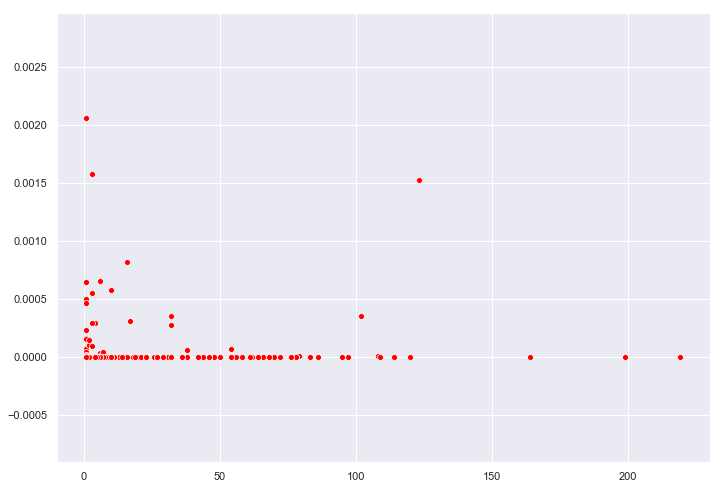

In [427]:
 sns.scatterplot(Deg_value,LB_value, color= 'red') 

### Person coefficient

In [27]:
nx.degree_pearson_correlation_coefficient(DG3, x='in', y='out', weight=None, nodes=None)


0.026985710169082917

## K_shell

In [55]:
KS3 = kshell(DG3, 3)

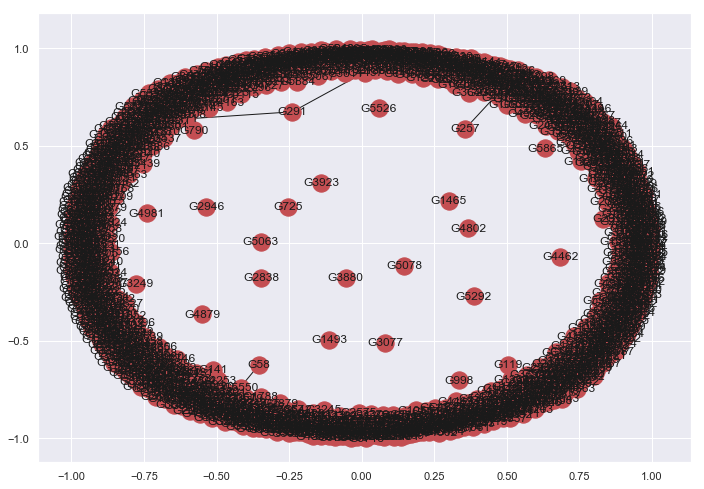

In [56]:
nx.draw_networkx(KS3[0])

# Visualisation

In [131]:
DG3V=nx.from_pandas_edgelist(edges, 'transcription_factor', 'target_gene', create_using= nx.DiGraph() ) #python3

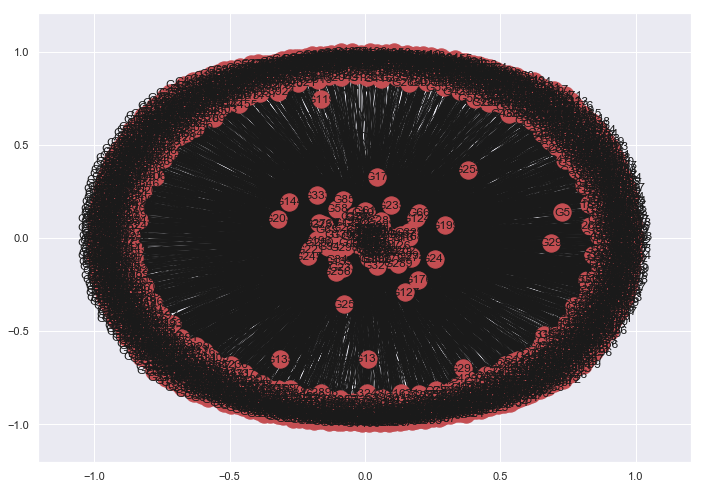

In [60]:
nx.draw_networkx(DG3V, with_labels=True)

NameError: name 'savefig' is not defined

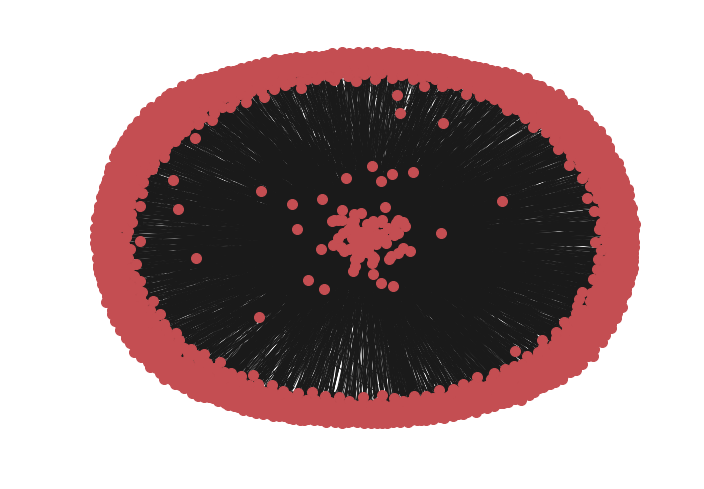

In [82]:
fig = plt.figure()
nx.draw_networkx(DG3V, with_labels=False, node_size=100) 

plt.axis('off')
savefig('graph1')

In [72]:
degrees = [(val) for (node, val) in DG3.degree()]
set(degrees)
nodes_color=[]
for n in degrees:
    col = n*0.5
    nodes_color.append(col)

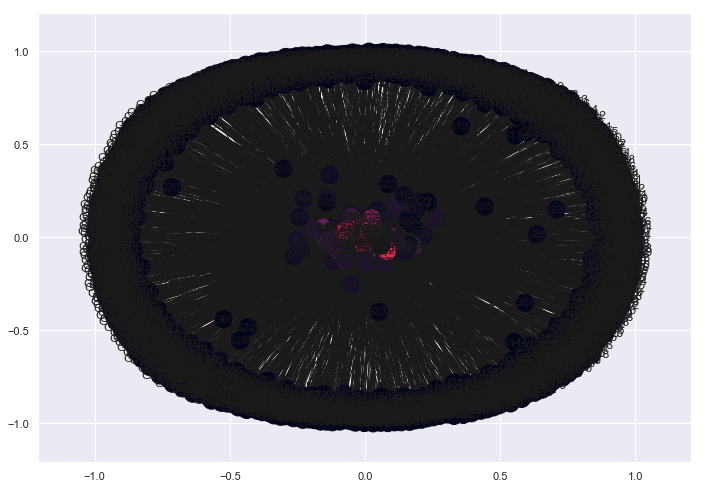

In [74]:
nx.draw_networkx(DG3V,node_color=nodes_color , with_labels=True)

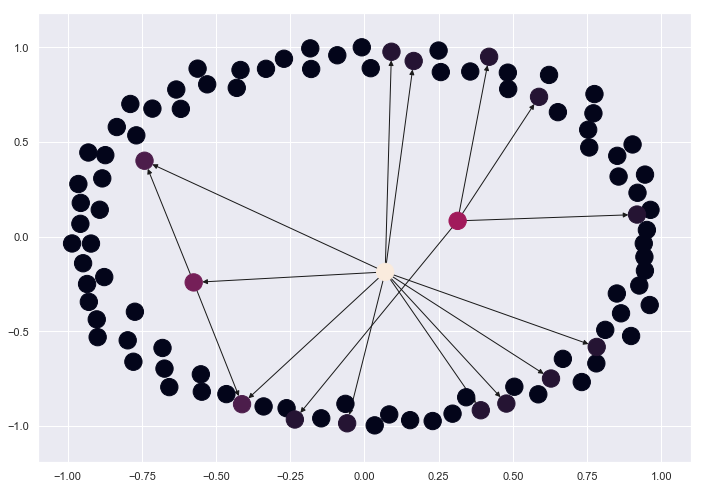

In [88]:
DG3S = DG3.subgraph(list(DG3V.nodes())[1:100])
degrees = [(val) for (node, val) in DG3S.degree()]
nodes_color=[]
for n in degrees:
    col = n*0.5
    nodes_color.append(col)
nx.draw_networkx(DG3S,node_color=nodes_color , with_labels=False)    
    

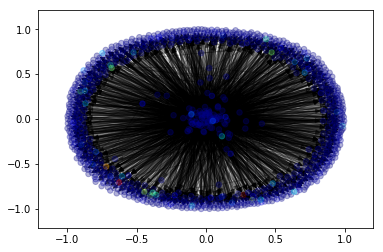

In [73]:
N= []
nodes_color =[]


for (node, val) in DG3.degree():
    if val != 1:
        N.append(node)
        nodes_color.append(val)


DG3S2 = DG3.subgraph(N)  
nx.spring_layout(DG3S2, dim = 10, scale = 3)
nx.draw_networkx(DG3S2,node_color=nodes_color , with_labels=False , node_size=30,cmap = plt.get_cmap('jet'), alpha=0.3 ) 

#plt.axis('off')


(-0.10461079522036017,
 1.1048969655018301,
 -0.10474642810717341,
 1.104055751646083)

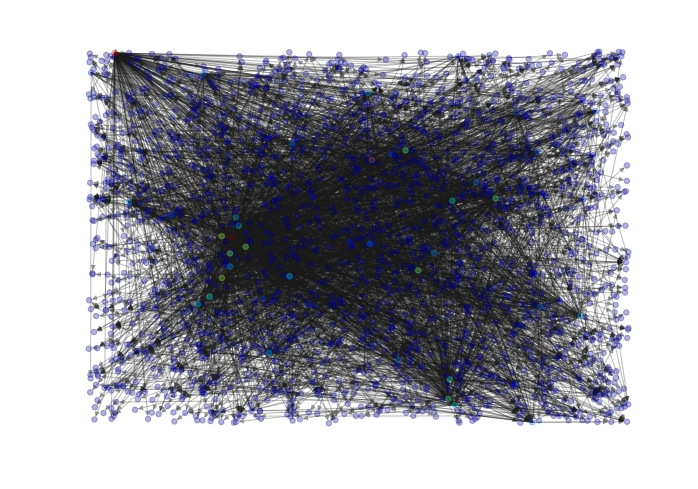

In [553]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
N= []
nodes_color =[]

for (node, val) in DG3.degree():
    
    N.append(node)
    nodes_color.append(val*4)


DG3S2 = DG3.subgraph(N)  
nx.spring_layout(DG3S2, dim = 20)
pos = nx.random_layout(DG3S2)
nx.draw_networkx(DG3S2,node_color=nodes_color , with_labels=False , pos=pos, node_size=30,cmap = plt.get_cmap('jet'), alpha=0.3 ) 

plt.axis('off')

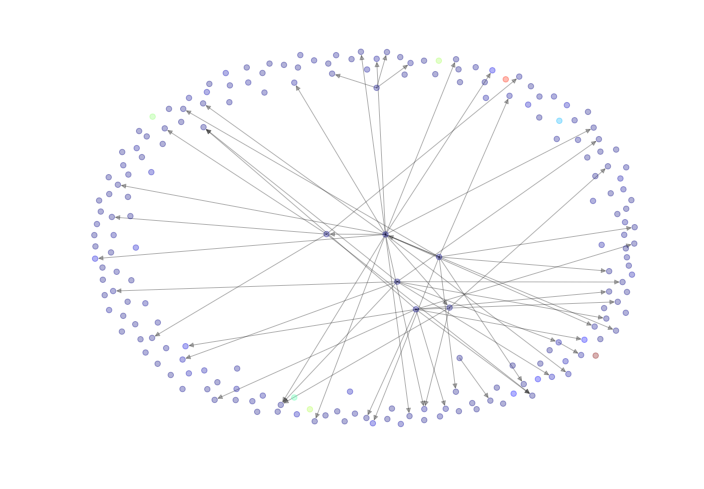

In [205]:
graph_with_degree(DG3,200)

(-1.2094704693555833,
 1.2044273203611375,
 -1.2046565720438955,
 1.2061415025591848)

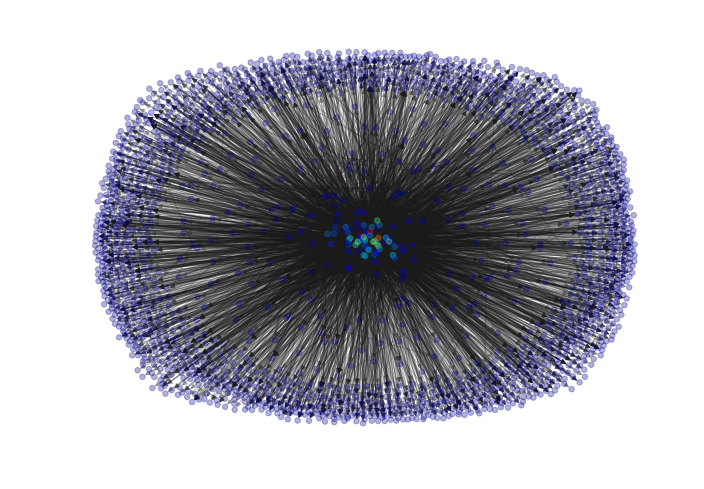

In [140]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
N= []
nodes_color =[]


for (node, val) in DG3.degree():
    
    N.append(node)
    nodes_color.append(val*4)


DG3S2 = DG3.subgraph(N)  
nx.spring_layout(DG3S2, dim = 20)
pos =  nx.spring_layout(DG3S2, k=0.3*1/np.sqrt(len(DG3S2.nodes())), iterations=20)
nx.draw_networkx(DG3S2,node_color=nodes_color , with_labels=False , pos=pos, node_size=30,cmap = plt.get_cmap('jet'), alpha=0.3 ) 

plt.axis('off')

['G3272', 'G5828', 'G5821', 'G909', 'G1', 'G904', 'G905', 'G5120', 'G4552', 'G4907', 'G1652', 'G3077', 'G5545', 'G1388', 'G1389', 'G1380', 'G176', 'G171', 'G172', 'G178', 'G1259', 'G1250', 'G1251', 'G1256', 'G1031', 'G752', 'G355', 'G4127', 'G2132', 'G2135', 'G4237', 'G4236', 'G4231', 'G4233', 'G3719', 'G3865', 'G3716', 'G3866', 'G5291', 'G5021', 'G5020', 'G2242', 'G3661', 'G2394', 'G2390', 'G2398', 'G3914', 'G4492', 'G3910', 'G3440', 'G5940', 'G5942', 'G5944', 'G3918', 'G3449', 'G5598', 'G2408', 'G2405', 'G3487', 'G3288', 'G4835', 'G4834', 'G917', 'G5723', 'G5724', 'G5725', 'G4712', 'G4711', 'G4715', 'G291', 'G292', 'G295', 'G296', 'G298', 'G101', 'G102', 'G104', 'G107', 'G109', 'G721', 'G5284', 'G1531', 'G1530', 'G610', 'G612', 'G434', 'G437', 'G433', 'G1754', 'G2896', 'G5195', 'G2890', 'G97', 'G95', 'G94', 'G98', 'G2874', 'G2877', 'G2658']


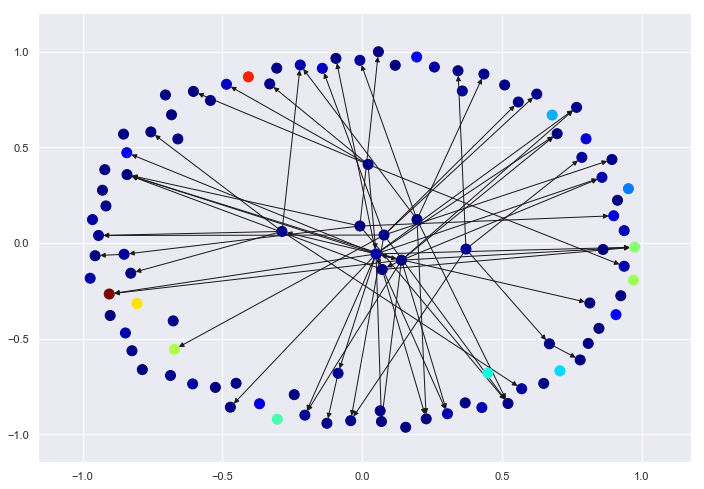

In [153]:
N= []
nodes_color =[]
for (node, val) in DG3.degree():
    if val > 1:
      
        N.append(node)
        nodes_color.append(val*2)
N = N[1:100] 
print(N)
nodes_color = nodes_color[1:40]
DG3S2 = DG3.subgraph(N)
#nx.spring_layout(DG3S2)
nx.draw_networkx(DG3S2,node_color=nodes_color , with_labels=False , node_size=100, cmap=plt.cm.jet  ) 

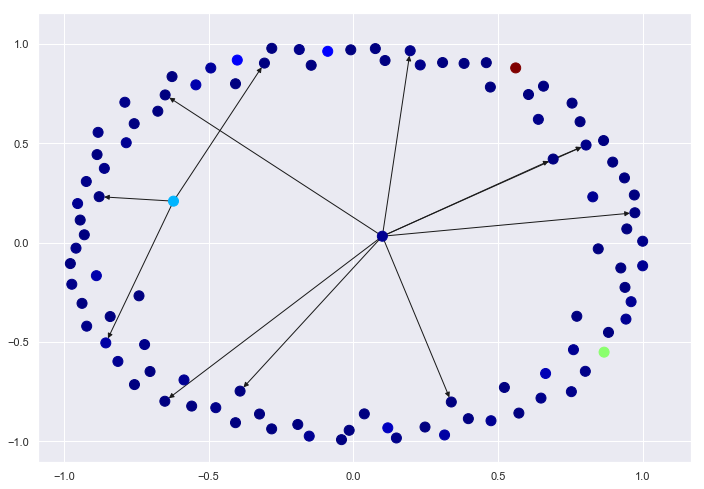

In [145]:
dDG3 = dict(DG3.degree())
type(dDG3)
dDG3
dDG3_pd = pd.DataFrame()
dDG3_pd['Nodes']= dDG3.keys()
dDG3_pd['deg'] =dDG3.values()
dDG3_pd.sort_values(by=['deg'], ascending=False)

DG3S3 = DG3.subgraph(dDG3_pd['Nodes'][1:100])


nx.draw_networkx(DG3S3,node_color=(dDG3_pd['deg'][1:100]) , with_labels=False , node_size=100, cmap=plt.cm.jet  ) 


G41


{'G41': Text(-0.00112166,-0.000593381,'G41')}

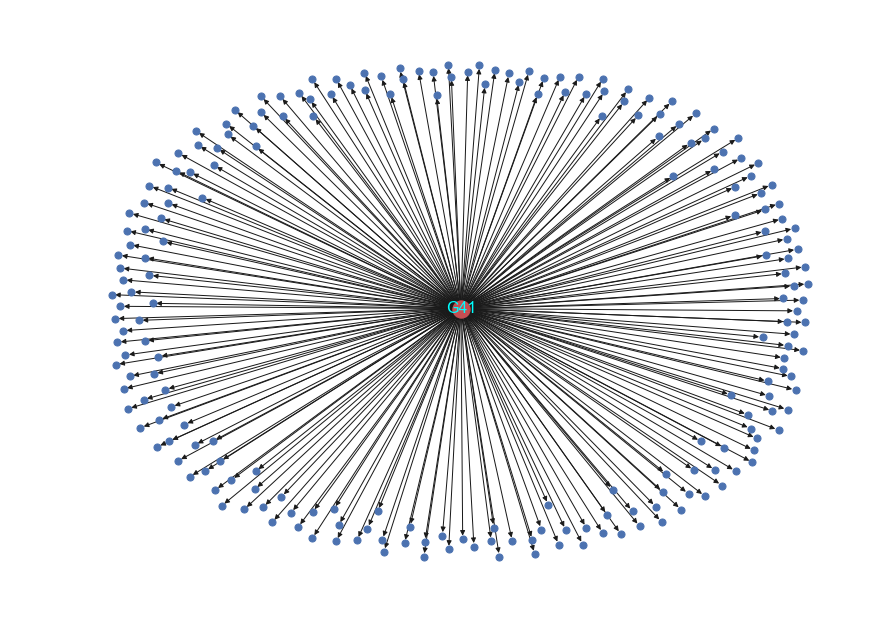

In [199]:
node_and_degree = DG3.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(DG3, largest_hub)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')

labels = {} 
labels[largest_hub]=largest_hub
print(largest_hub)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(DG3,pos,labels,font_size=16,font_color='cyan')

#plt.show()

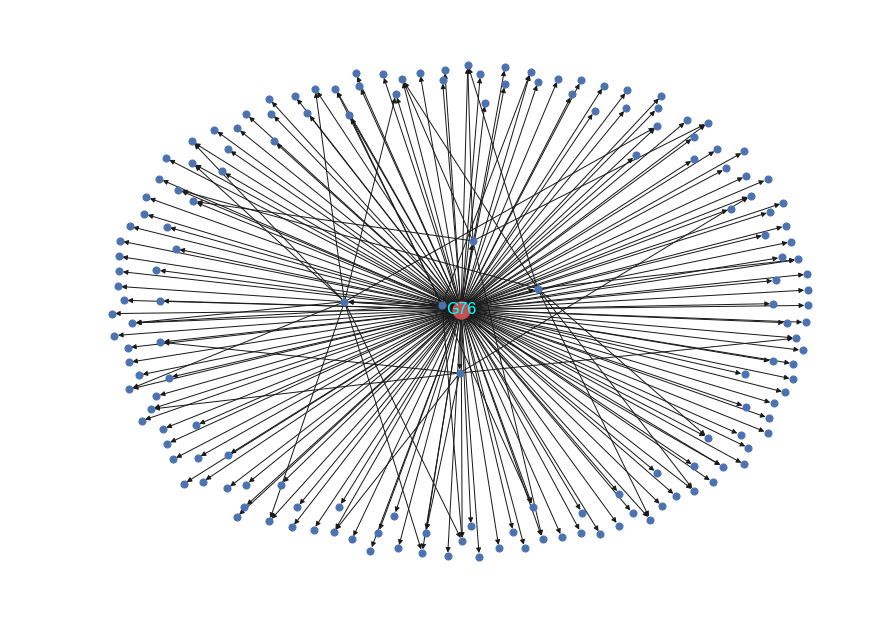

In [118]:
egocentric_graph(DG3,3)

In [162]:
node_and_degree = DG3.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(DG3, largest_hub)


DG3S4 = DG3.subgraph(hub_ego.nodes)
DG3S4.degree()




DiDegreeView({'G5782': 1, 'G3675': 1, 'G25': 1, 'G2863': 1, 'G229': 1, 'G4636': 1, 'G2905': 1, 'G4959': 1, 'G4881': 1, 'G2272': 1, 'G4286': 1, 'G3677': 1, 'G3779': 1, 'G2074': 1, 'G1664': 1, 'G4575': 1, 'G1070': 1, 'G4289': 1, 'G5371': 1, 'G3772': 1, 'G4682': 1, 'G3075': 1, 'G2408': 1, 'G1584': 1, 'G782': 1, 'G2768': 1, 'G1136': 1, 'G3592': 1, 'G4209': 1, 'G1237': 1, 'G145': 1, 'G1169': 1, 'G3453': 1, 'G1764': 1, 'G996': 1, 'G2912': 1, 'G4691': 1, 'G1474': 1, 'G5938': 1, 'G3768': 1, 'G1893': 1, 'G4077': 1, 'G3284': 1, 'G3512': 1, 'G3280': 1, 'G5932': 1, 'G3048': 1, 'G5638': 1, 'G368': 1, 'G5480': 1, 'G5166': 1, 'G365': 1, 'G366': 1, 'G2445': 1, 'G3361': 1, 'G3617': 1, 'G921': 1, 'G1569': 1, 'G41': 217, 'G3774': 1, 'G4899': 1, 'G1406': 1, 'G4064': 1, 'G4065': 1, 'G2060': 1, 'G2505': 1, 'G4537': 1, 'G3058': 1, 'G1992': 1, 'G2183': 1, 'G2999': 1, 'G1853': 1, 'G1998': 1, 'G1512': 1, 'G3857': 1, 'G5259': 1, 'G560': 1, 'G5255': 1, 'G4261': 1, 'G4266': 1, 'G5251': 1, 'G188': 1, 'G3746': 1, 'G

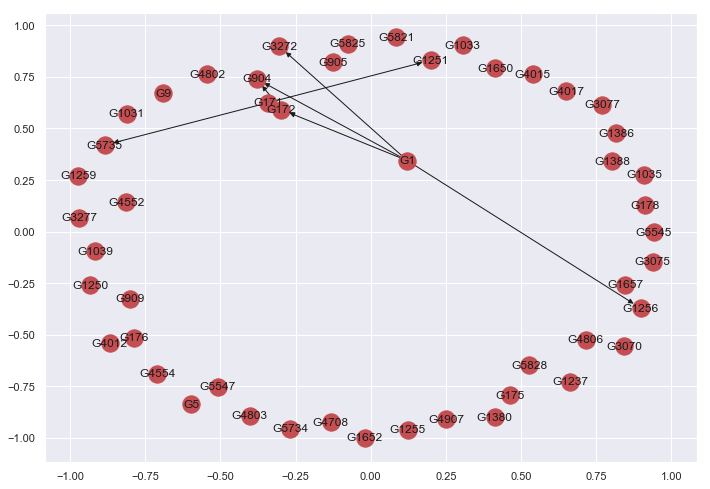

In [179]:
B
dDGBC_pd = pd.DataFrame()
dDGBC_pd['Nodes']= B.keys()
dDGBC_pd['deg'] =B.values()
dDGBC_pd.sort_values(by=['deg'], ascending=False)

DGBC_LN = dDGBC_pd['Nodes'][1:50]

DGBC_LN.append(dDGBC_pd['Nodes'][500:550])


DG3S5 = DG3.subgraph(DGBC_LN)
nx.draw_networkx(DG3S5 )

sorted_B = sorted(B, key=itemgetter(1))

(-1.1627124076194275,
 1.166094783439302,
 -1.113790950823276,
 1.1105908181988786)

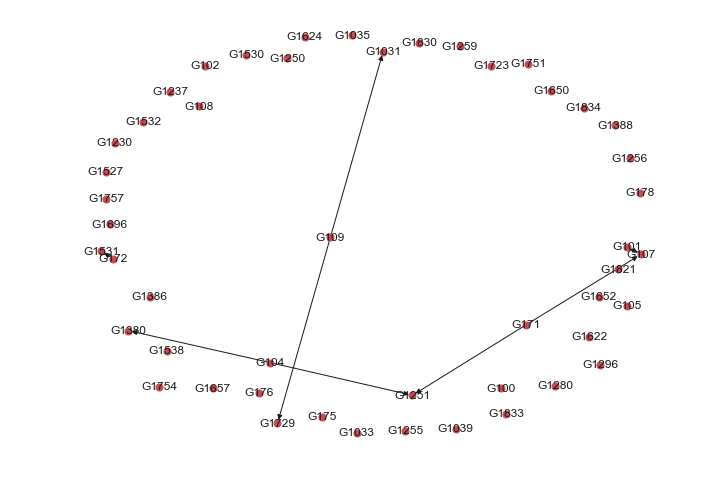

In [364]:

sorted_B = sorted(B, key=itemgetter(1))
DG3S5 = DG3.subgraph(sorted_B[1:50])
nx.draw_networkx(DG3S5, with_labels=True , node_size=50  )
plt.axis('off')

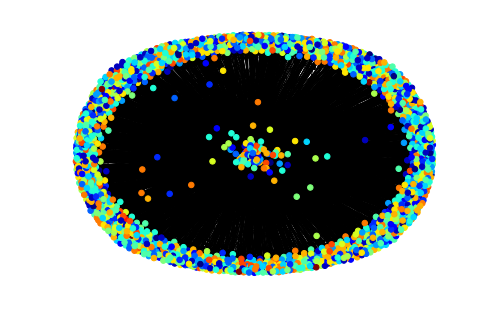

In [533]:
# Louvain community
partition = community_louvain.best_partition(DG3.to_undirected())
#print(partition)
values = partition.values()
nx.draw_spring(DG3, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)

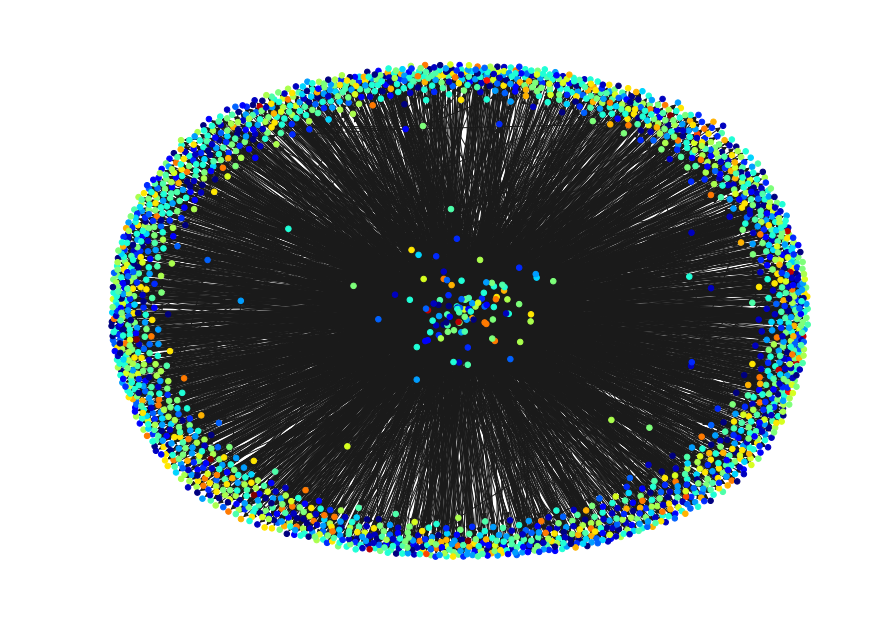

In [119]:
DG3SL = DG3.subgraph(list(DG3.nodes()))
partition2 = community_louvain.best_partition(DG3SL.to_undirected())
values = partition2.values()
nx.draw_spring(DG3SL, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)

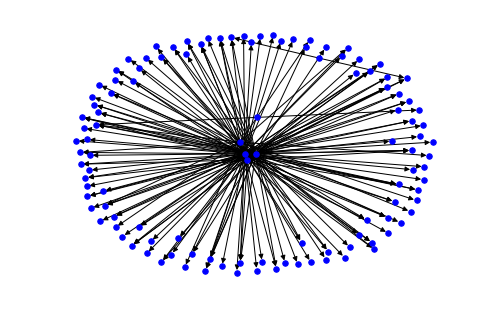

In [28]:
louvain_community_graph(DG3,3)

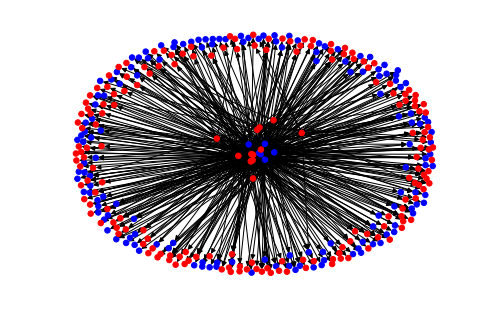

In [58]:
partition = community_louvain.best_partition(DG3.to_undirected())
#print(partition)
NB =[]
NR = []
for key, value in partition.iteritems():
    if value==1 :
        NB.append(key)
    if value==2 :
        NR.append(key)

x = np.array(["blue", "red"])
col = np.repeat(x, [len(NB), len(NR)], axis=0)

N = NB + NR

DG3SL2 = DG3.subgraph(N)
nx.draw_spring(DG3SL2,node_color=col, cmap = plt.get_cmap('jet'), node_size=30, with_labels=False)

G109


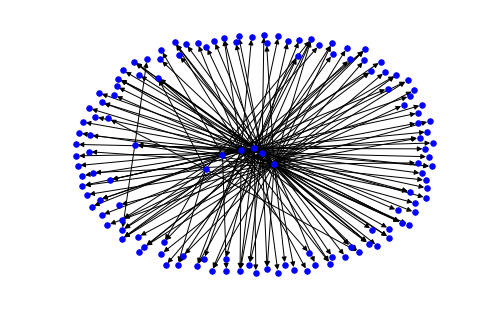

In [63]:
partition = community_louvain.best_partition(DG3.to_undirected())
#print(partition)
N =[]
for key, value in partition.iteritems():

    if value==2 :
        N.append(key)

DG3SL2 = DG3.subgraph(N)
nx.draw_spring(DG3SL2, cmap = plt.get_cmap('jet'), node_color = 'blue'  ,node_size=30, with_labels=False)
node_and_degree = DG3SL2.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
print(largest_hub)

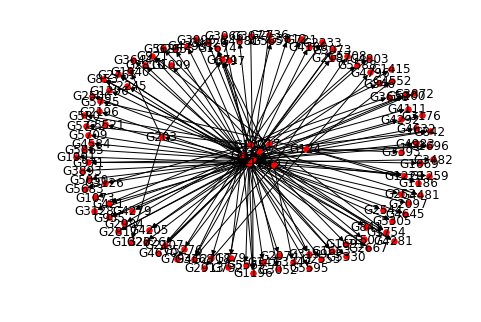

In [532]:
partition = community_louvain.best_partition(DG3.to_undirected())
#print(partition)
N =[]
for key, value in partition.iteritems():

    if value==1 :
        N.append(key)

DG3SL3 = DG3.subgraph(N)


labels = {}    
for elmt in DG3.degree():
    if elmt[1] > 2:
        #set the node name as the key and the label as its value 
        labels[elmt[0]] = elmt[0]
pos = nx.spring_layout(DG3SL3)       
nx.draw_spring(DG3SL3,node_color = 'red'  ,node_size=30, with_labels=True)        
#print(set(labels))       
#set the argument 'with labels' to False so you have unlabeled graph
#nx.draw(G, with_labels=False)
#Now only add labels to the nodes you require (the hubs in my case)
#nx.draw_networkx_labels(DG3SL3,pos,labels,font_size=16,font_color='r')
#(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]


['G5784', 'G4552', 'G3205', 'G4806', 'G1966', 'G1965', 'G4066', 'G1652', 'G1227', 'G187', 'G2751', 'G4796', 'G1139', 'G355', 'G354', 'G4248', 'G210', 'G524', 'G4162', 'G453', 'G5828', 'G909', 'G184', 'G175', 'G675', 'G1031', 'G1421', 'G5335', 'G213', 'G2317', 'G2135', 'G1729', 'G3713', 'G3815', 'G3666', 'G2392', 'G5944', 'G1622', 'G2763', 'G5753']


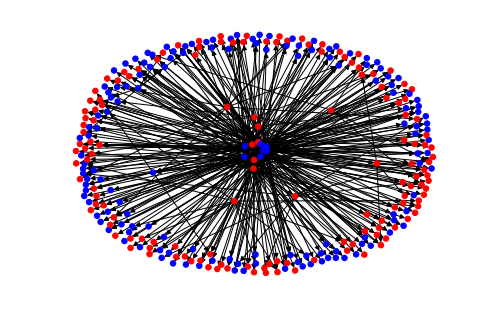

In [62]:

partition = community_louvain.best_partition(DG3.to_undirected())
#print(partition)
NB =[]
NR = []
for key, value in partition.iteritems():
    if value==1 :
        NB.append(key)
    if value==2 :
        NR.append(key)

x = np.array(["blue", "red"])
col = np.repeat(x, [len(NB), len(NR)], axis=0)

N = NB + NR




DG3SL2 = DG3.subgraph(N)


nx.draw_spring(DG3SL2,node_color=col, cmap = plt.get_cmap('jet'), node_size=30, with_labels=False)

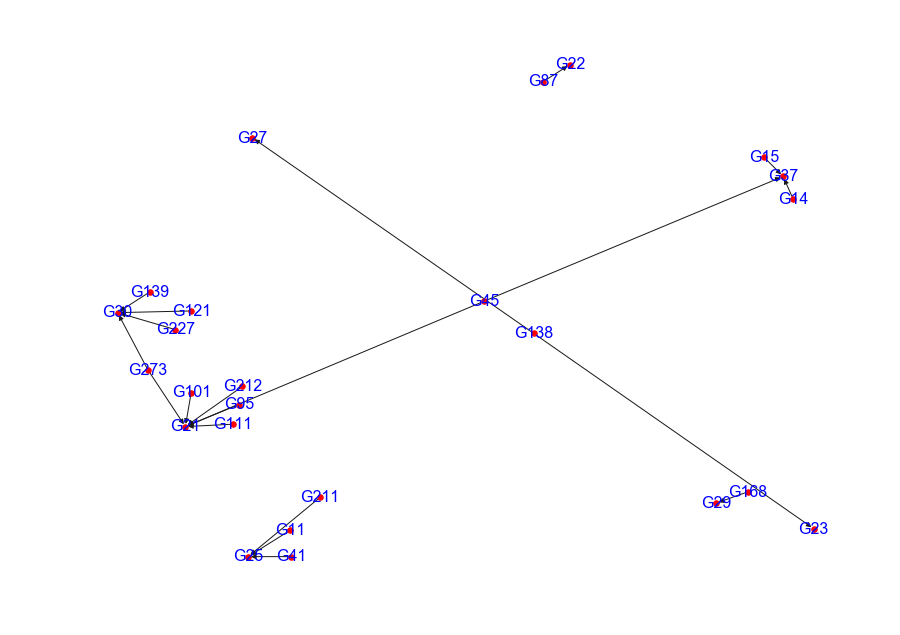

In [119]:

nodes_color =[]

for (node, val) in DG3.degree():
   
    nodes_color.append(val)


DG=nx.from_pandas_edgelist(edges.iloc[25:45,:], 'transcription_factor', 'target_gene', create_using= nx.DiGraph() )
pos = nx.spring_layout(DG,scale =3 )
nx.draw_spring(DG,node_color = 'red' ,node_size=30, with_labels=True,font_size=16,font_color='blue', )    

(-1.1428610587927153,
 1.1201871202762164,
 -1.0994225424377924,
 1.086506224628621)

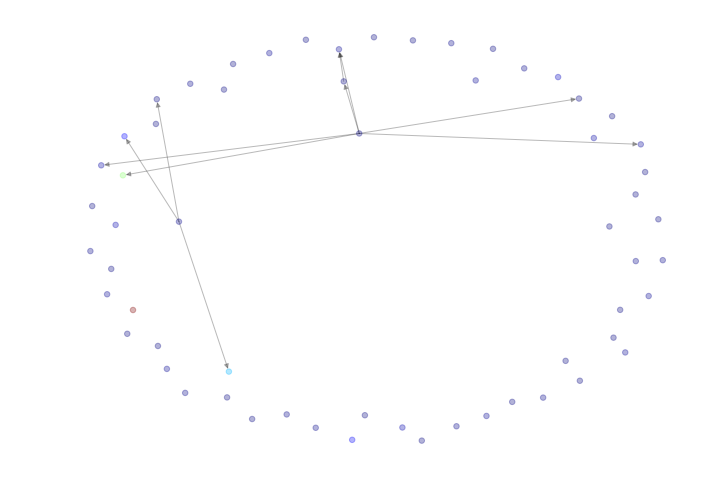

In [108]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
N= []
nodes_color =[]
for (node, val) in DG3.degree():
    N.append(node)
    nodes_color.append(val*4)
      
N = N[:60] 
nodes_color = nodes_color[:60]

DG3SE = DG3.subgraph(N)  
nx.spring_layout(DG, dim = 20)
pos = nx.kamada_kawai_layout(DG )
nx.draw_networkx(DG3SE,node_color=nodes_color , with_labels=False ,  node_size=30,cmap = plt.get_cmap('jet'), alpha=0.3 ) 
plt.axis('off')

In [168]:
 def graph_neighborhood (G,n): 
    current_node = n
   # print(current_node)
    if (list(DG3V.neighbors(current_node)))!=0:
        
        print([(current_node, n) for n in G.neighbors(current_node)])
     
        for ne in DG3V.neighbors(current_node):
            graph_neighborhood (G,ne)
         

        

In [534]:
#graph_neighborhood (DG3V,'G87')

In [535]:
#L = (list(nx.dfs_edges(DG3, source='G87')))
#print(L)

(-0.6267799974922015,
 0.6729662255805294,
 -1.1020625841698415,
 0.8986290528709677)

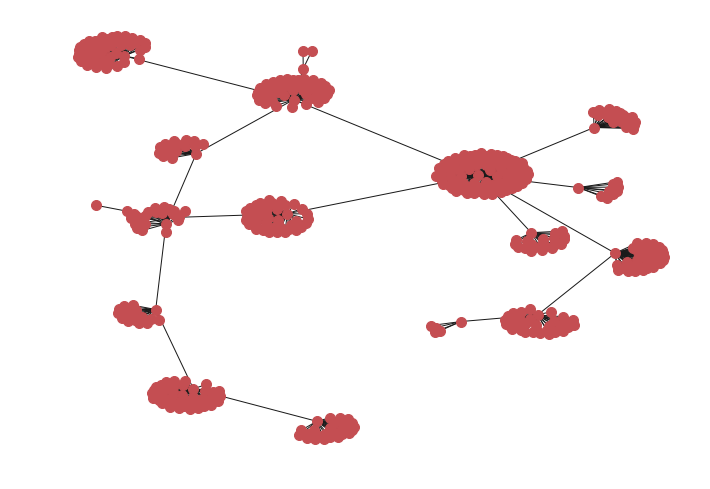

In [202]:
GDFS=nx.Graph()
GDFS.add_edges_from(L)
nx.draw_networkx(GDFS, with_labels=False , node_size=100  )

plt.axis('off')

[('G295', 'G4472'), ('G295', 'G1966'), ('G295', 'G1585'), ('G295', 'G2255'), ('G295', 'G5185'), ('G295', 'G5084'), ('G295', 'G5106'), ('G295', 'G4168'), ('G295', 'G4333')]


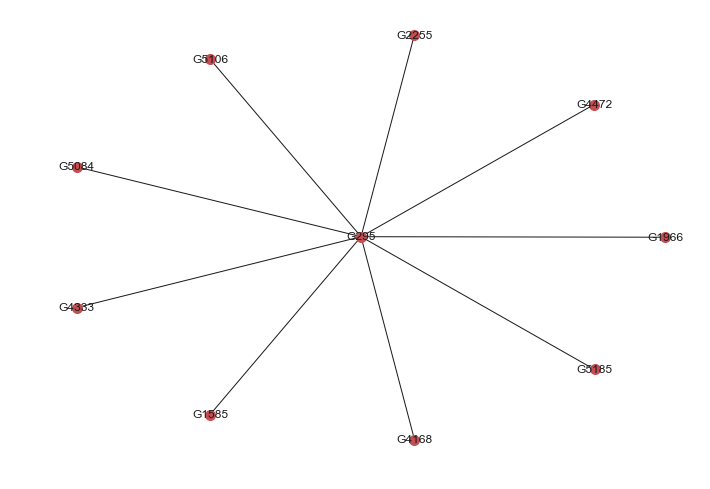

In [222]:
DFS_graph(DG3,'G295', True)

ValueError: too many values to unpack

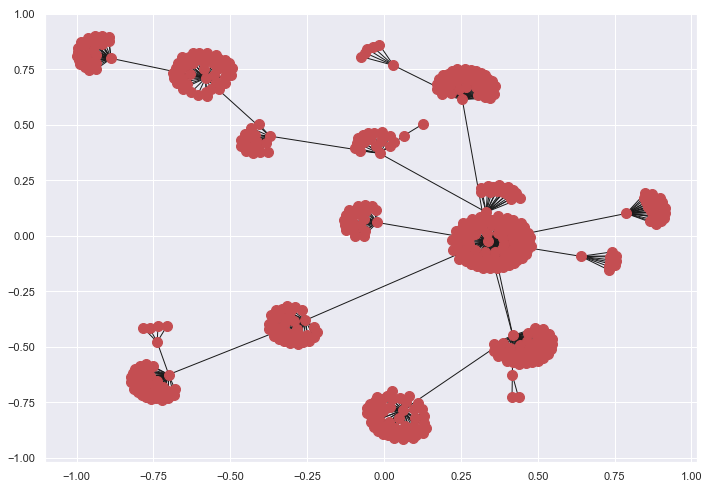

In [200]:
L = (list(nx.dfs_edges(DG3, source='G171')))
GDFS=nx.Graph()
GDFS.add_edges_from(L)

node_and_degree = DG3.degree()
SD = sorted(node_and_degree, key=itemgetter(1))

hubs = []
for n in SD :
    if n[1]>1:
        hubs.append(n[0])
        
labels = {}    
for node in GDFS.nodes():
    if node in hubs:
        #set the node name as the key and the label as its value 
        labels[node] = node
#set the argument 'with labels' to False so you have unlabeled graph
pos = nx.spring_layout(GDFS, dim = 20)
nx.draw_networkx(GDFS, with_labels=False , node_size=100  )

#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(GDFS,pos,labels)
plt.axis('off')

## K-SHELL

In [598]:
KS = kshell(DG3)
KS = list(itertools.chain.from_iterable(KS))
KS[1:10]

KS =set(KS)
N= []
nodes_color =[]
KS2 = {}
for elmt in KS:
    if elmt[0] not in N:
        KS2[elmt[0]] = elmt[1]
        N.append(elmt[0])
        nodes_color.append(elmt[1])   
    else :
        print(elmt[0])
   # print(elmt[1])

#N= (set(N))
#len(N)

#DG3.degree()

G110
G87
G223


(-1.2064253443479538,
 1.2096603268384933,
 -1.2085545641183852,
 1.2059989553689956)

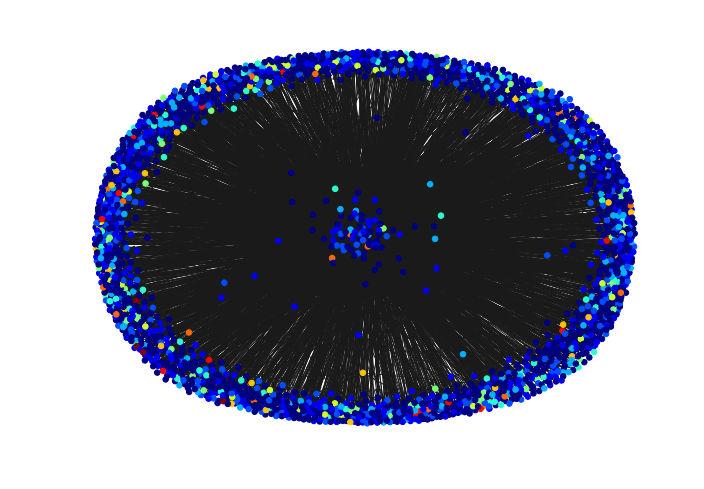

In [615]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
DG3S2 = DG3.subgraph(N)  
nodes_color = np.asarray(nodes_color )
nx.spring_layout(DG3S2)

nx.draw_networkx(DG3S2,node_color=nodes_color , with_labels=False , node_size=30,cmap = plt.get_cmap('jet'), alpha=1 ) 

plt.axis('off')

G4327
G1958
G5465
G5299
G3429
G5345
G5104
G5066
G2725
G2333
G5595
G223
G499
G730
G4059
G3261
G2886
G124
G3113
G1644
G62
G5721
G5550
G1904
G4584
G4491
G421
G4289
G4726
G4115
G2592
G3956
G3058
G923
G4468
G3960
G5030
G274
G5514
G2879
G4336
G3912
G332
G4924
G3595
G1593
G5932
G2963
G5383
G3935
G2273
G2011
G3373
G2445
G2718
G4796
G4036
G2658
G1299
G4437
G218
G4972
G2299
G971
G2400
G4751
G1513
G3120
G473
G145
G110
G4582
G109
G4080
G1908
G5517
G3964
G102
G2249
G248
G539
G5099
G4597
G1376
G4127
G393
G1811
G41
G2135
G1273
G1518
G2046
G4480
G205
G3857
G4140
G4894
G1915
G4517
G3893
G1680
G5801
G1334
G5934
G650
G5419
G5160
G2942
G11
G13
G3739
G4141
G1695
G3469
G86
G5068
G2953
G275
G3106
G2863
G3536
G732
G5050
G2524
G3035
G5946
G623
G3514
G5195
G5535
G3424
G1266
G5151
G2112
G79
G5881
G2484
G231
G3183
G1538
G5781
G3203
G4162
G1112
G5520
G1265
G3874
G2417
G2934
G5692
G4956
G810
G1293
G416
G2751
G544
G4411
G1983
G5090
G5865
G5253
G2245
G769
G1469
G48
G1762
G721
G1028
G942
G670
G3048
G2408
G5221
G5141
G

(-1.0496906039002356,
 1.1947669804611083,
 -1.0364055041303342,
 1.1415780070396253)

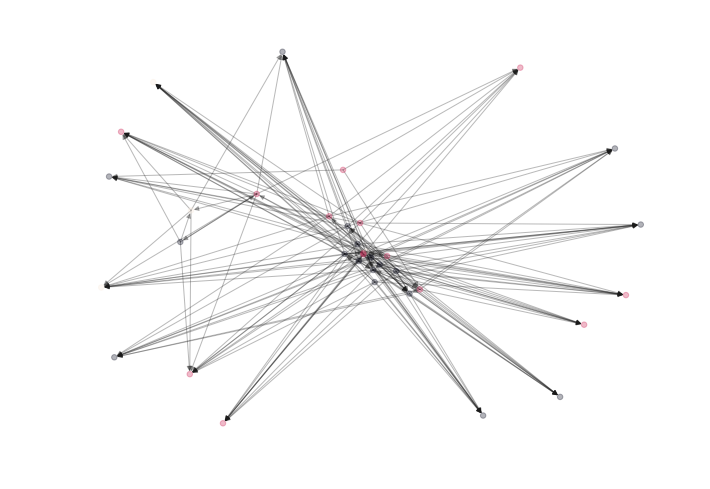

In [585]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
N= []
nodes_color =[]
for elmt in KS:
    if elmt[1]>8 and elmt[0] not in N :
        
        N.append(elmt[0])
        nodes_color.append(elmt[1])
    else:
            print(elmt[0])
DG = DG3.subgraph(N)  
nodes_color = np.asarray(nodes_color )
nx.spring_layout(DG, dim = 20)
   
nx.draw_networkx(DG,node_color=nodes_color , with_labels=False ,  node_size=30,alpha=0.3 ) 
plt.axis('off')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

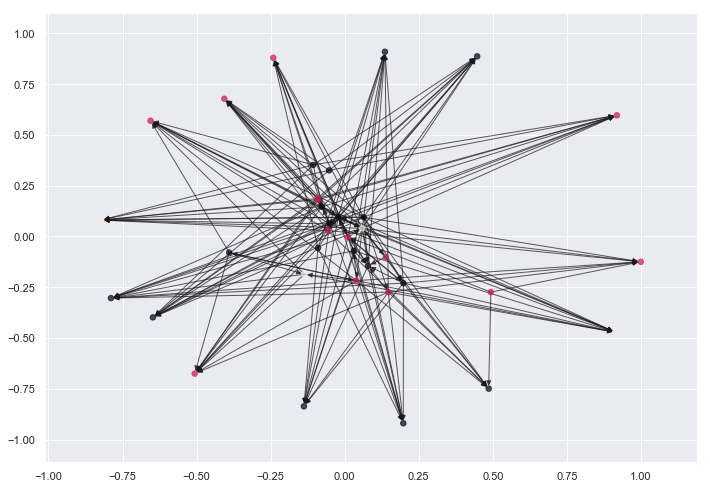

In [593]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
N= []
nodes_color =[]
for elmt in KS:
    if elmt[1]>8 and elmt[0] not in N :
        
        N.append(elmt[0])
        nodes_color.append(elmt[1])
   # else:
           # print(elmt[0])
DG = DG3.subgraph(N)  
nodes_color = np.asarray(nodes_color )
nx.spring_layout(DG, dim = 20)
   
nc = nx.draw_networkx(DG,node_color=nodes_color , with_labels=False ,  node_size=30,alpha=0.7 ) 
plt.colorbar(nc)
plt.axis('off')

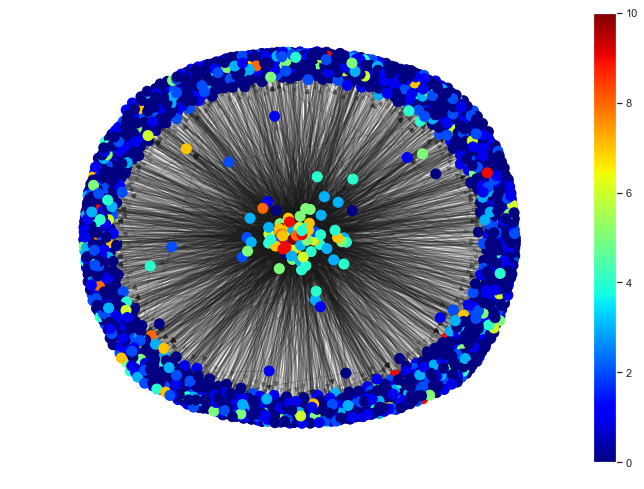

In [614]:
nx.set_node_attributes(DG3, KS2, 'ks')
groups = set(nx.get_node_attributes(DG3,'ks').values())
mapping = dict(zip(sorted(groups),count()))
nodes = DG3.nodes()
colors = [mapping[DG3.node[n]['ks']] for n in nodes]
# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(DG3)
ec = nx.draw_networkx_edges(DG3, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(DG3, pos, nodelist=nodes, node_color=colors, 
                            with_labels=False, node_size=100, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.show()

(-1.2026253399791664,
 1.132390482637894,
 -1.0825079598061174,
 1.1860562275109299)

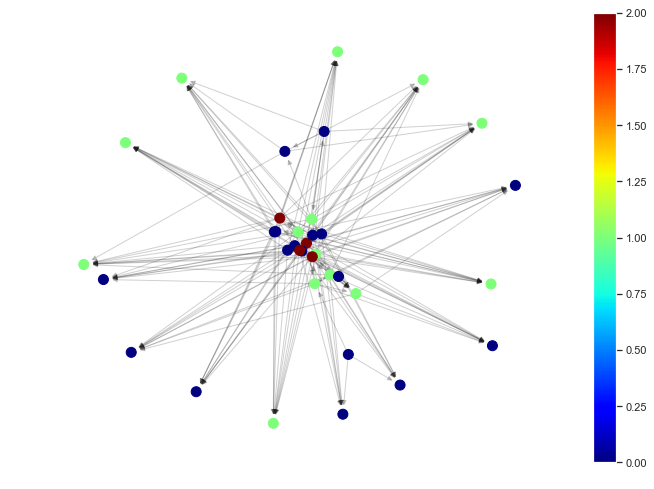

In [636]:
KS3 ={}
N= []
for n,val in KS2.iteritems():
    if val >8  :
        
        N.append(n)
        KS3[n]=val
     
   # else:
           # print(elmt[0])

DG = DG3.subgraph(N)  
nx.set_node_attributes(DG, KS3, 'ks')
nx.set_node_attributes(DG3, KS2, 'ks')
groups = set(nx.get_node_attributes(DG,'ks').values())
#print(groups)
mapping = dict(zip(sorted(groups),count()))
nodes = DG.nodes()
colors = [mapping[DG.node[n]['ks']] for n in nodes]
# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(DG)
ec = nx.draw_networkx_edges(DG, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(DG, pos, nodelist=nodes, node_color=colors, 
                            with_labels=False, node_size=100, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')


(-1.1204952176504368,
 1.1579902856242417,
 -1.0519245683283893,
 1.1949792576239646)

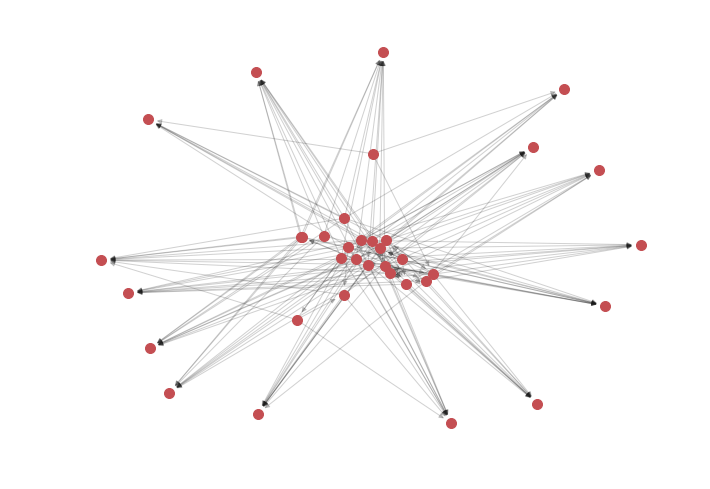

In [638]:
KS3 ={}
N= []
for n,val in KS2.iteritems():
    if val >8  :
        
        N.append(n)
        KS3[n]=val
     
   # else:
           # print(elmt[0])

DG = DG3.subgraph(N)  
nx.set_node_attributes(DG, KS3, 'ks')
nx.set_node_attributes(DG3, KS2, 'ks')
groups = set(nx.get_node_attributes(DG,'ks').values())
#print(groups)
#mapping = dict(zip(sorted(groups),count()))
nodes = DG.nodes()
#colors = [mapping[DG.node[n]['ks']] for n in nodes]
# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(DG)
ec = nx.draw_networkx_edges(DG, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(DG, pos, nodelist=nodes,  with_labels=False, node_size=100)
plt.axis('off')

(-1.187423769235611,
 1.1735764181613924,
 -1.1168088192471664,
 1.1423659735952523)

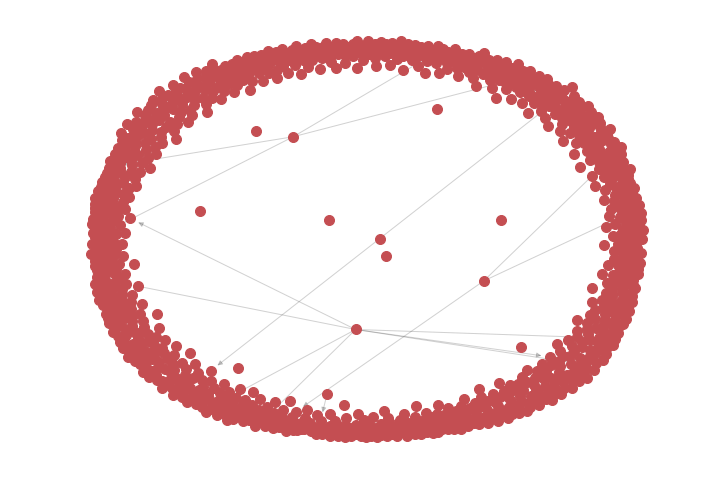

In [639]:
KS3 ={}
N= []
for n,val in KS2.iteritems():
    if val <2  :
        
        N.append(n)
        KS3[n]=val
     
   # else:
           # print(elmt[0])

DG = DG3.subgraph(N)  
nx.set_node_attributes(DG, KS3, 'ks')
nx.set_node_attributes(DG3, KS2, 'ks')
groups = set(nx.get_node_attributes(DG,'ks').values())
#print(groups)
#mapping = dict(zip(sorted(groups),count()))
nodes = DG.nodes()
#colors = [mapping[DG.node[n]['ks']] for n in nodes]
# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(DG)
ec = nx.draw_networkx_edges(DG, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(DG, pos, nodelist=nodes,  with_labels=False, node_size=100)
plt.axis('off')